# **APS360 Project - Instrument Classifier**

 *Disclaimer: While training the different models the accuracy and loss values would vary while re-training on the same parameters. Therefore, some of the numbers in this document may no longer match the values in the final report exactly because we re-compiled before submission.*

In [ ]:
import os
import matplotlib.pyplot as plt
#Load librosa to convert our audio files
import librosa
import librosa.display 
import pandas as pd
import numpy as np

import sklearn

from sklearn.metrics import accuracy_score

#to actually play the audio
import IPython.display as ipd

"""
path_audio_files = "/Test audio/"
audio_clips = os.listdir(path_audio_files)

#check number of files
print(len(audio_clips))
print(audio_clips)
"""

'\npath_audio_files = "/Test audio/"\naudio_clips = os.listdir(path_audio_files)\n\n#check number of files\nprint(len(audio_clips))\nprint(audio_clips)\n'

# ***Data Processing***

old code for initial pre processing

In [ ]:
#df = pd.read_csv ('/content/train.csv') 
#df


**Get count of each instrument in csv**

In [ ]:
#groupby_label = df.groupby(['label']).count()
#print(str(groupby_label.sort_values(by=['fname'], ascending= False)))

**Choose instruments for classification**

In [ ]:
#df = df[df['label'].isin(['Acoustic_guitar','Hi-hat','Double_bass','Saxophone','Clarinet', 'Cello','Trumpet','Bass_drum', 'Violin_or_fiddle', 'Flute'])]

**make sure size and count matches**

In [ ]:
#df.shape

**get count of samples per instrument**

In [ ]:
#chosen = df.groupby(['label']).count()
#chosen

,fname,manually_verified
label,,
Acoustic_guitar,300,300
Bass_drum,300,300
Cello,300,300
Clarinet,300,300
Double_bass,300,300
Flute,300,300
Hi-hat,300,300
Saxophone,300,300
Trumpet,300,300


**Save csv file**

In [ ]:
  #df2.to_csv('/content/new2secs.csv',index=False)

**upload new csv**

In [ ]:
#df = pd.read_csv ('/content/new.csv')
#df 

**unzip audio files**

In [ ]:
#df = pd.read_csv ('/content/new2secs.csv')
#df

,fname,label,manually_verified,Duration
0,00044347.wav,Hi-hat,0,14.00
1,001ca53d.wav,Saxophone,1,10.32
2,00353774.wav,Cello,1,4.52
3,003b91e8.wav,Cello,0,13.28
4,004ad66f.wav,Clarinet,0,7.00
...,...,...,...,...
2189,ff55a1e2.wav,Acoustic_guitar,0,14.66
2190,ff752a0c.wav,Clarinet,1,6.00
2191,ff875923.wav,Cello,0,11.84
2192,ff9c6c3f.wav,Trumpet,0,12.06


In [ ]:
#!unzip /content/drive/MyDrive/aps360\ project/new.zip -d /content/audio/

## Add Duration Attribute to CSV

In [ ]:
#path = path = "/content/audio/content/audio/audio_train/"
#df["Duration"] = ""


#for i in range(df.shape[0]):
#  df.at[i, "Duration"] = librosa.get_duration(filename= (path+df['fname'].iloc[i]))


In [ ]:
#df

,fname,label,manually_verified,Duration
0,00044347.wav,Hi-hat,0,14
1,001ca53d.wav,Saxophone,1,10.32
2,002d256b.wav,Trumpet,0,0.44
3,00353774.wav,Cello,1,4.52
4,003b91e8.wav,Cello,0,13.28
...,...,...,...,...
2995,ff752a0c.wav,Clarinet,1,6
2996,ff875923.wav,Cello,0,11.84
2997,ff9c6c3f.wav,Trumpet,0,12.06
2998,ffc92b01.wav,Cello,1,6.24


**discard damples with duration less than 2 seconds**

In [ ]:
#df = df[df['Duration'] >= 2.0]


**get count after 2 second duration limit**

In [ ]:
#df.groupby(['label']).count()

,fname,manually_verified,Duration
label,,,
Acoustic_guitar,275,275,275
Bass_drum,240,240,240
Cello,286,286,286
Clarinet,290,290,290
Double_bass,255,255,255
Flute,270,270,270
Hi-hat,282,282,282
Saxophone,250,250,250
Trumpet,257,257,257


**delete files that are not needed. only keep files that are in csv for the selected instruments. reduces time  for donwload and upload, and zip and unzip**

In [ ]:
#names = []

#for name in df['fname']:
 # names.append(name)

#print(len(names))

2194


In [ ]:
#path = "/content/audio/content/audio/audio_train/"

#remove=0
#for file in os.listdir(path):
#  if file not in names : 
#    try:
#      remove+=1
#      os.remove(path+file)
#    except:
#      print("Error while deleting file : ", path)




**ZIP new audio files**

In [ ]:
#!zip -r /content/new2secs.zip /content/audio/content/audio/audio_train

In [ ]:
pip install scikit-learn

In [ ]:
df = pd.read_csv ('/content/new2secs.csv')
row, col = df.shape

**get count of sampels per instrument**

In [ ]:
chosen = df.groupby(['label']).count()
chosen

,fname,manually_verified,Duration
label,,,
Acoustic_guitar,275,275,275
Bass_drum,80,80,80
Cello,286,286,286
Clarinet,290,290,290
Double_bass,205,205,205
Flute,270,270,270
Hi-hat,141,141,141
Saxophone,250,250,250
Trumpet,207,207,207


In [ ]:
temp = df

## Duplicate Samples

In [ ]:
violin = 0
double_bass = 0
trumpet = 0 

for i in df.values:
    if i[1] == 'Bass_drum':
      for x in range(2):
        new = pd.DataFrame([i], columns = ['fname','label','manually_verified','Duration'])
        temp = temp.append(new,ignore_index=True)
    elif i[1] == 'Hi-hat':
      new = pd.DataFrame([i], columns = ['fname','label','manually_verified','Duration'])
      temp = temp.append(new,ignore_index=True)
    elif i[1] == 'Violin_or_fiddle' and violin <60 :
      new = pd.DataFrame([i], columns = ['fname','label','manually_verified','Duration'])
      temp = temp.append(new,ignore_index=True)
      violin += 1
    elif i[1] == 'Double_bass' and double_bass <50 :
      new = pd.DataFrame([i], columns = ['fname','label','manually_verified','Duration'])
      temp = temp.append(new,ignore_index=True)
      double_bass += 1
    elif i[1] == 'Trumpet' and trumpet <50 :
          new = pd.DataFrame([i], columns = ['fname','label','manually_verified','Duration'])
          temp = temp.append(new,ignore_index=True)
          trumpet += 1

In [ ]:
df = temp
print(df.shape)

(2655, 4)


In [ ]:
chosen = df.groupby(['label']).count()
print(chosen)

                  fname  manually_verified  Duration
label                                               
Acoustic_guitar     275                275       275
Bass_drum           240                240       240
Cello               286                286       286
Clarinet            290                290       290
Double_bass         255                255       255
Flute               270                270       270
Hi-hat              282                282       282
Saxophone           250                250       250
Trumpet             257                257       257
Violin_or_fiddle    250                250       250


## Split data

**70/15/15 split**

In [ ]:
train = round(0.7*row) 
validation = round(0.15*row) 
df = df.sample(frac=1)

train_data = df[:train]
validation_data = df[train:train+validation]
test_data = df[row - validation:]

In [ ]:
#print(train_data)
#print(validation_data)
#print(test_data)
len(train_data)
chosen = train_data.groupby(['label']).count()
chosen


***Mounting our Google Drive in order to unzip dataset with all audio clips of 2 seconds minimum length***



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
#!rm -rf /content/audio

In [ ]:
#!rm -rf /content/test
#!rm -rf /content/train
#!rm -rf /content/valid

In [ ]:
!unzip /content/gdrive/MyDrive/DATA/new2secs.zip -d /content/audio/

In [ ]:
# Creating the separate files to make it easier to store our data for the training, validation and testing set
!mkdir train
!mkdir valid
!mkdir test


In [ ]:
# Defining the arrays that will store our audio wav files
train_names = []
valid_names = []
test_names = []

# Looping through each respective dataset and adding it to the corresponding arrays
for name in train_data['fname']:
  train_names.append(name)
for name in validation_data['fname']:
  valid_names.append(name)
for name in test_data['fname']:
  test_names.append(name)

# Test code to check if the sizes matched our dataset sizes
#print(len(train_names))
#print(len(valid_names))
#print(len(test_names))


***The code below is to separate our training, validation and testing data in 3 separate folders to be able to organize our waveforms and heatmap images later in the code.***




In [ ]:
# The code below is placing the wav files from the training, validation and testing data into their respective files on Colab
import glob
import shutil
path = "/content/audio/content/audio/content/audio/audio_train/*.*"
for file in glob.glob(path):
  if os.path.basename(file) in train_names:
    shutil.copy(file, "/content/train")

  if os.path.basename(file) in valid_names:
    shutil.copy(file, "/content/valid")

  if os.path.basename(file) in test_names:
    shutil.copy(file, "/content/test")

In [ ]:
audio_train_files = "/content/train/"
audio_valid_files = "/content/valid/"
audio_test_files = "/content/test/"

# Retrieving the name of each wav file in each set

audio_train_clips = os.listdir(audio_train_files)
audio_valid_clips = os.listdir(audio_valid_files)
audio_test_clips = os.listdir(audio_test_files)



# Testing the files for content and size
#print(len(audio_train_clips))
#print(len(audio_valid_clips))
#print(len(audio_test_clips))
#sum = len(audio_test_clips)+len(audio_train_clips)+len(audio_valid_clips)
#print(sum)

In [ ]:
#load audio files to visualize its waveform
training_dataset= list()

# Librosa.load used to retrieve the time-series values for each audio clip in the training data
for i in range(len(audio_train_clips)):
  x, sr = librosa.load(audio_train_files+audio_train_clips[i])
  training_dataset.append(x)


In [ ]:
#load audio files to visualize its waveform
validation_dataset= list()

# Librosa.load used to retrieve the time-series values for each audio clip in the validation data
for i in range(len(audio_valid_clips)):
  x, sr = librosa.load(audio_valid_files+audio_valid_clips[i])
  validation_dataset.append(x)


In [ ]:
#load audio files to visualize its waveform
testing_dataset= list()

# Librosa.load used to retrieve the time-series values for each audio clip in the testing data
for i in range(len(audio_test_clips)):
  x, sr = librosa.load(audio_test_files+audio_test_clips[i])
  testing_dataset.append(x)


In [ ]:
# Converting our arrays to numpy arrays
traing_dataset=np.array(training_dataset)
validation_dataset=np.array(validation_dataset)
testing_dataset=np.array(validation_dataset)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


***The code below is used to remove all of the time-series values after 2 seconds for every audio clip in each dataset. This is to ensure the inputs to our CNN will all be of the same size.***


In [ ]:
training_audio_waves= list()
valid_audio_waves= list()
test_audio_waves= list()

# Remove values after 2 seconds. The 44100 is equivalent to the sampling rate x 2 seconds. (our sampling rate was 22050)
for i in range(len(training_dataset)):
  training_audio_waves.append(training_dataset[i][:44100])

for i in range(len(validation_dataset)):
  valid_audio_waves.append(validation_dataset[i][:44100])

for i in range(len(testing_dataset)):
  test_audio_waves.append(testing_dataset[i][:44100])


In [ ]:
# Convert our final data sets to numpy arrays
training_audio_waves= np.array(training_audio_waves)
valid_audio_waves= np.array(valid_audio_waves)
test_audio_waves= np.array(test_audio_waves)

***Below are plots of the waveforms for random audio clips in each set.***

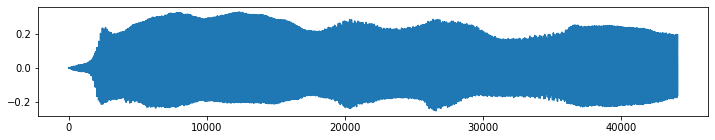

In [ ]:
# Display the waveform for the 22nd audio clip in the training dataset
plt.figure(figsize=(12,2))
plt.plot(training_audio_waves[22])
plt.show()


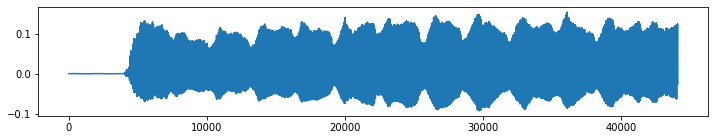

In [ ]:
# Display the waveform for the 10th audio clip in the validation dataset
plt.figure(figsize=(12,2))
plt.plot(valid_audio_waves[10])
plt.show()


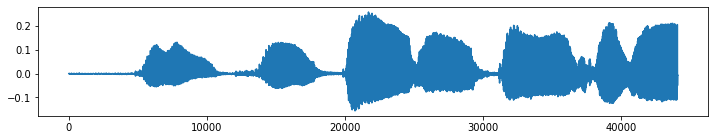

In [ ]:
# Display the waveform for the 30th audio clip in the testing set
plt.figure(figsize=(12,2))
plt.plot(test_audio_waves[30])
plt.show()


***The code below is to create the arrays for the labels in each dataset to be used later in creating our one-hot encodings.***


In [ ]:
labels_train_array= list()
for i in range(len(audio_train_clips)):
  labels_train_array.append(df[df['fname']== audio_train_clips[i]]['label'].values[0])

labels_train_array = np.array(labels_train_array)
print(len(labels_train_array))
print(labels_train_array)

In [ ]:
labels_valid_array= list()
for i in range(len(audio_valid_clips)):
  labels_valid_array.append(df[df['fname']== audio_valid_clips[i]]['label'].values[0])

labels_valid_array = np.array(labels_valid_array)

print(len(labels_valid_array))
print(labels_valid_array)

In [ ]:
labels_test_array= list()
for i in range(len(audio_test_clips)):
  labels_test_array.append(df[df['fname']== audio_test_clips[i]]['label'].values[0])

labels_test_array = np.array(labels_test_array)
print(len(labels_test_array))
print(labels_train_array)

***The code below is where we take the waveforms of each audio clip in all of our sets and apply the mfcc function to extract features and create the final heatmaps.***

In [ ]:
pip install SpeechRecognition

     |████████████████████████████████| 32.8MB 118kB/s 


In [ ]:
pip install python_speech_features

  Created wheel for python-speech-features: filename=python_speech_features-0.6-cp37-none-any.whl size=5887 sha256=b5632a10b65e5d03e703e4f200afaeb9c0ef17a5cc45251fbdd1d490e8686854
  Stored in directory: /root/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-speech-features


In [ ]:
import os
import librosa
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from python_speech_features import mfcc
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential

In [ ]:
# Defining the array to store our values for the MFCC representations of the training audio clips to create our heat maps
mfcc_features_training_dataset = list()

for i in range(len(training_audio_waves)):
  mfcc_features_training_dataset.append(mfcc(training_audio_waves[i]))


# Test code to check if sizes match
#print(training_audio_waves.shape)
#print(mfcc_features_training_dataset.shape)

In [ ]:
# Defining the array to store our values for the MFCC representations of the validation audio clips to create our heat maps
mfcc_features_validation_dataset = list()


for i in range(len(valid_audio_waves)):
  mfcc_features_validation_dataset.append(mfcc(valid_audio_waves[i]))

# Test code to check if sizes match
#print(valid_audio_waves.shape)
#print(mfcc_features_validation_dataset.shape)

In [ ]:
# Defining the array to store our values for the MFCC representations of the testing audio clips to create our heat maps
mfcc_features_testing_dataset = list()

for i in range(len(test_audio_waves)):
  mfcc_features_testing_dataset.append(mfcc(test_audio_waves[0]))

# Test code to check if sizes match
#print(test_audio_waves.shape)
#print(mfcc_features_testing_dataset.shape)

In [ ]:
# Convert heatmap arrays to numpy arrays
mfcc_features_validation_dataset= np.array(mfcc_features_validation_dataset)
mfcc_features_training_dataset= np.array(mfcc_features_training_dataset)
mfcc_features_testing_dataset= np.array(mfcc_features_testing_dataset)

# Test code
#print(mfcc_features_a.shape)
#print(mfcc_features_b.shape)
#print(mfcc_features_c.shape)

***Below are the plots for our final heatmap (images) that we will use as inputs for our CNN.***

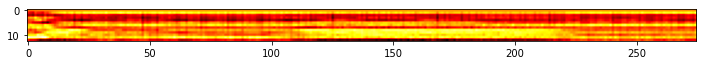

In [ ]:
# Display the mfcc features of the 22nd audio clip in the training dataset as a heatmap
plt.figure(figsize=(12, 2))
plt.imshow(mfcc_features_training_dataset[22].T, cmap='hot')
plt.show()

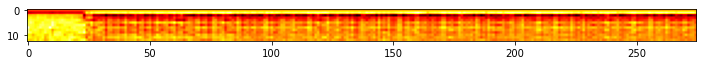

In [ ]:
# Display the mfcc features of the 10th audio clip in the validation dataset as a heatmap
plt.figure(figsize=(12, 2))
plt.imshow(mfcc_features_validation_dataset[10].T, cmap='hot')
plt.show()

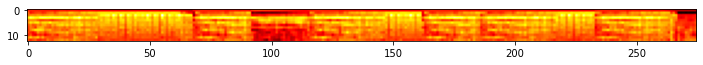

In [ ]:
# Display the mfcc features of the 30th audio clip in the testing dataset as a heatmap
plt.figure(figsize=(12, 2))
plt.imshow(mfcc_features_training_dataset[30].T, cmap='hot')
plt.show()

***Below we define our hot encodings for the training, validation and testing sets.***


In [ ]:
label_encoder_a = LabelEncoder()
label_encoded_a = label_encoder_a.fit_transform(labels_train_array)
#print(label_encoded_a)

label_encoded_a = label_encoded_a[:, np.newaxis]
label_encoded_a

one_hot_encoder_a = OneHotEncoder(sparse=False)
one_hot_encoded_a = one_hot_encoder_a.fit_transform(label_encoded_a)
one_hot_encoded_a
print(one_hot_encoded_a.shape)

(1385, 10)


In [ ]:
label_encoder_b = LabelEncoder()
label_encoded_b = label_encoder_b.fit_transform(labels_valid_array)
#print(label_encoded_b)

label_encoded_b = label_encoded_b[:, np.newaxis]
label_encoded_b

one_hot_encoder_b = OneHotEncoder(sparse=False)
one_hot_encoded_b = one_hot_encoder_b.fit_transform(label_encoded_b)
one_hot_encoded_b
print(one_hot_encoded_b.shape)

(323, 10)


In [ ]:
label_encoder_c = LabelEncoder()
label_encoded_c = label_encoder_c.fit_transform(labels_test_array)
#print(label_encoded_c)

label_encoded_c = label_encoded_c[:, np.newaxis]
label_encoded_c

one_hot_encoder_c = OneHotEncoder(sparse=False)
one_hot_encoded_c = one_hot_encoder_c.fit_transform(label_encoded_c)
one_hot_encoded_c
print(one_hot_encoded_c.shape)

(752, 10)


# ***Baseline Model***

**Baseline Model: Fully Connected Layer**

Epoch 1/30
44/44 [==============================] - 1s 11ms/step - loss: 6.9262 - acc: 0.2535 - val_loss: 2.5363 - val_acc: 0.3344
Epoch 2/30
44/44 [==============================] - 0s 7ms/step - loss: 2.1870 - acc: 0.3357 - val_loss: 2.1475 - val_acc: 0.3932
Epoch 3/30
44/44 [==============================] - 0s 7ms/step - loss: 1.6346 - acc: 0.4690 - val_loss: 1.8590 - val_acc: 0.4675
Epoch 4/30
44/44 [==============================] - 0s 7ms/step - loss: 1.3916 - acc: 0.5465 - val_loss: 1.8095 - val_acc: 0.4954
Epoch 5/30
44/44 [==============================] - 0s 7ms/step - loss: 1.2374 - acc: 0.6042 - val_loss: 1.7292 - val_acc: 0.5449
Epoch 6/30
44/44 [==============================] - 0s 7ms/step - loss: 1.0646 - acc: 0.6748 - val_loss: 1.8819 - val_acc: 0.5356
Epoch 7/30
44/44 [==============================] - 0s 7ms/step - loss: 0.8919 - acc: 0.7229 - val_loss: 1.6780 - val_acc: 0.5604
Epoch 8/30
44/44 [==============================] - 0s 8ms/step - loss: 0.9390 - acc: 0.7

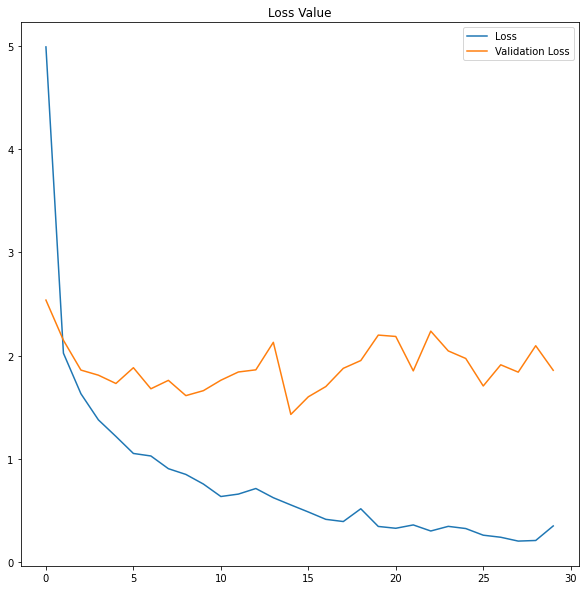

Accuracy: 0.9075812101364136
Validation Accuracy: 0.6996904015541077


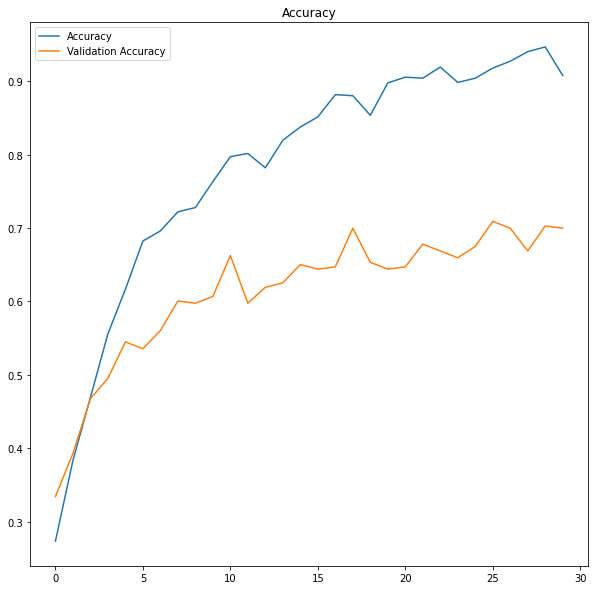

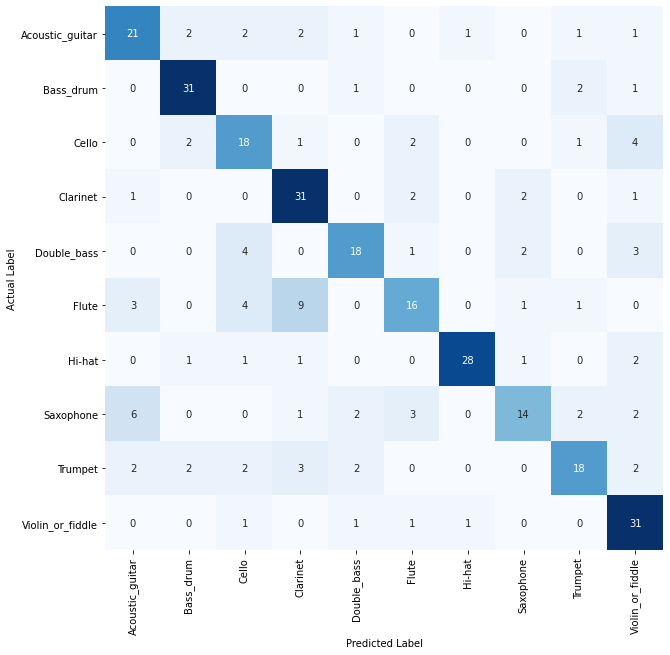

In [97]:
# Train/Validation/Test split
X_train, X_validation, y_train, Y_validation = mfcc_features_training_dataset, mfcc_features_validation_dataset, one_hot_encoded_a, one_hot_encoded_b
X_test, y_test = mfcc_features_testing_dataset, one_hot_encoded_c

# Defining input shape for the neural network
input_shape = (X_train.shape[1], X_train.shape[2], 1)

# Reshape X_train and X_validation such that they are having the same shape as the input shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_validation = X_validation.reshape(X_validation.shape[0], X_validation.shape[1], X_validation.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Constructing the neural network architecture
model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', 
     optimizer = 'adam',
     metrics = ['acc'])

# Training the model
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_validation, Y_validation))

# Displaying loss values
plt.figure(figsize = (10, 10))
plt.title('Loss Value')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
print('Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])
plt.show()

# Displaying accuracy scores
plt.figure(figsize=(10, 10))
plt.title('Accuracy')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Accuracy', 'Validation Accuracy'])
print('Accuracy:', history.history['acc'][-1])
print('Validation Accuracy:', history.history['val_acc'][-1])
plt.show()

# Model evaluation
predictions = model.predict(X_validation)

predictions = np.argmax(predictions, axis=1)
Y_validation = one_hot_encoder_b.inverse_transform(Y_validation)

# Creating confusion matrix
cm = confusion_matrix(Y_validation, predictions)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True, xticklabels = label_encoder_a.classes_, yticklabels = label_encoder_b.classes_, fmt = 'd', cmap = plt.cm.Blues, cbar = False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

# ***Final Primary Model***

Epoch 1/30
44/44 [==============================] - 3s 44ms/step - loss: 2.7414 - acc: 0.1625 - val_loss: 1.7473 - val_acc: 0.3653
Epoch 2/30
44/44 [==============================] - 2s 39ms/step - loss: 1.7235 - acc: 0.3824 - val_loss: 1.3784 - val_acc: 0.5480
Epoch 3/30
44/44 [==============================] - 2s 39ms/step - loss: 1.4628 - acc: 0.5027 - val_loss: 1.2798 - val_acc: 0.5975
Epoch 4/30
44/44 [==============================] - 2s 39ms/step - loss: 1.2489 - acc: 0.5672 - val_loss: 1.1436 - val_acc: 0.6440
Epoch 5/30
44/44 [==============================] - 2s 39ms/step - loss: 1.1129 - acc: 0.6252 - val_loss: 1.1529 - val_acc: 0.6409
Epoch 6/30
44/44 [==============================] - 2s 39ms/step - loss: 0.9807 - acc: 0.6731 - val_loss: 1.1464 - val_acc: 0.6316
Epoch 7/30
44/44 [==============================] - 2s 40ms/step - loss: 0.9518 - acc: 0.6691 - val_loss: 1.0499 - val_acc: 0.6718
Epoch 8/30
44/44 [==============================] - 2s 40ms/step - loss: 0.9007 - a

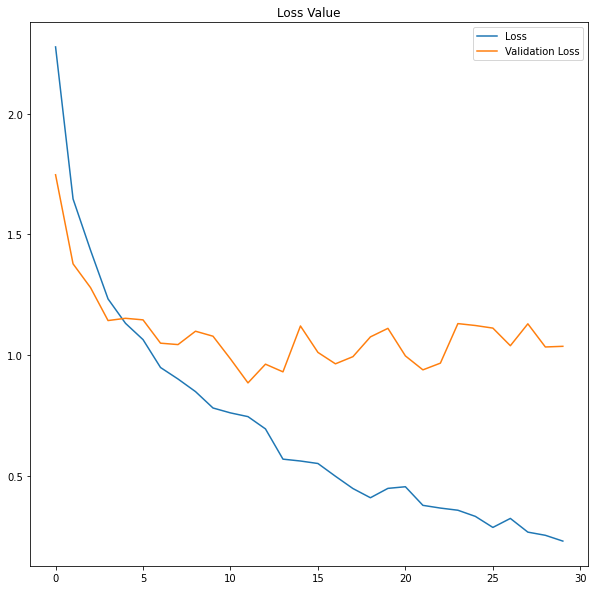

Accuracy: 0.9227436780929565
Validation Accuracy: 0.7832817435264587


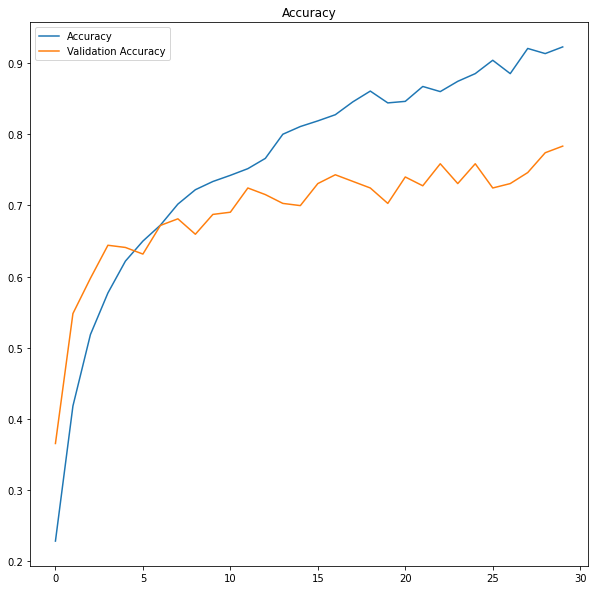

In [99]:
# Train/Validation/Test split
X_train, X_validation, y_train, Y_validation = mfcc_features_training_dataset, mfcc_features_validation_dataset, one_hot_encoded_a, one_hot_encoded_b
X_test, y_test = mfcc_features_testing_dataset, one_hot_encoded_c

# Defining input shape for the neural network
input_shape = (X_train.shape[1], X_train.shape[2], 1)

# Reshape X_train and X_validation such that they are having the same shape as the input shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_validation = X_validation.reshape(X_validation.shape[0], X_validation.shape[1], X_validation.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Constructing the neural network architecture
model = Sequential()
model.add(Conv2D(32, (4, 4), activation ='relu', strides=(2, 2), 
    padding='same', input_shape=input_shape))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (4, 4), activation='relu', strides=(2, 2), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])

# Training the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_validation, Y_validation))

# Displaying loss values
plt.figure(figsize=(10, 10))
plt.title('Loss Value')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
print('Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])
plt.show()

# Displaying accuracy scores
plt.figure(figsize=(10, 10))
plt.title('Accuracy')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Accuracy', 'Validation Accuracy'])
print('Accuracy:', history.history['acc'][-1])
print('Validation Accuracy:', history.history['val_acc'][-1])
plt.show()

## Final Accuracy

Testing accuracy =  0.7832817337461301


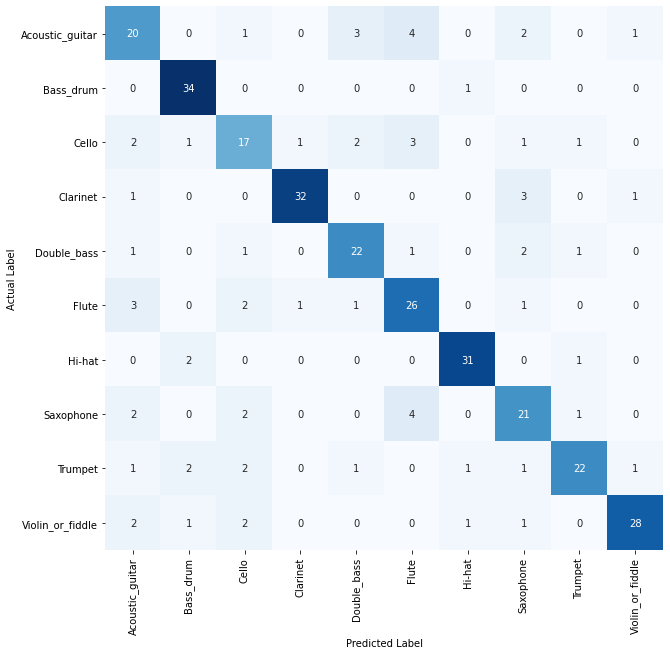

In [101]:
# Model evaluation on unseen data (testing data)
predictions = model.predict(X_test)

predictions = np.argmax(predictions, axis=1)
y_test = one_hot_encoder_b.inverse_transform(y_test)

ans = sklearn.metrics.accuracy_score(y_test, predictions, normalize=True, sample_weight=None)
print("Testing accuracy = ", ans)

# Creating confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, xticklabels=label_encoder_a.classes_, yticklabels=label_encoder_b.classes_, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

# ***Tuning Process***

**Below here are all the small changes and tuning that was done to the CNN model. This is not revelant to the Final Primary Model.**

Epoch 1/30
44/44 [==============================] - 22s 473ms/step - loss: 9.1289 - acc: 0.1317 - val_loss: 2.0204 - val_acc: 0.2508
Epoch 2/30
44/44 [==============================] - 20s 466ms/step - loss: 2.0949 - acc: 0.2403 - val_loss: 1.8470 - val_acc: 0.3158
Epoch 3/30
44/44 [==============================] - 20s 464ms/step - loss: 2.0196 - acc: 0.2725 - val_loss: 1.8339 - val_acc: 0.3932
Epoch 4/30
44/44 [==============================] - 20s 465ms/step - loss: 1.9043 - acc: 0.2940 - val_loss: 1.7436 - val_acc: 0.3870
Epoch 5/30
44/44 [==============================] - 21s 468ms/step - loss: 1.8563 - acc: 0.3334 - val_loss: 1.6465 - val_acc: 0.4613
Epoch 6/30
44/44 [==============================] - 20s 466ms/step - loss: 1.6951 - acc: 0.3760 - val_loss: 1.4949 - val_acc: 0.5139
Epoch 7/30
44/44 [==============================] - 20s 466ms/step - loss: 1.4623 - acc: 0.4732 - val_loss: 1.3004 - val_acc: 0.5851
Epoch 8/30
44/44 [==============================] - 21s 469ms/step - 

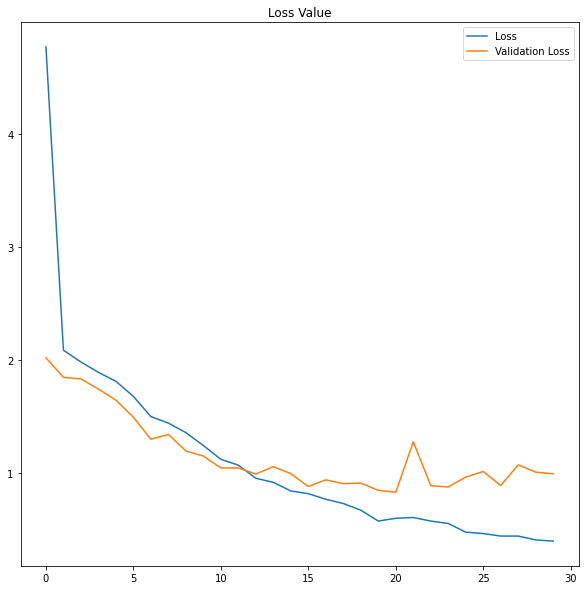

Accuracy: 0.867870032787323
Validation Accuracy: 0.7213622331619263


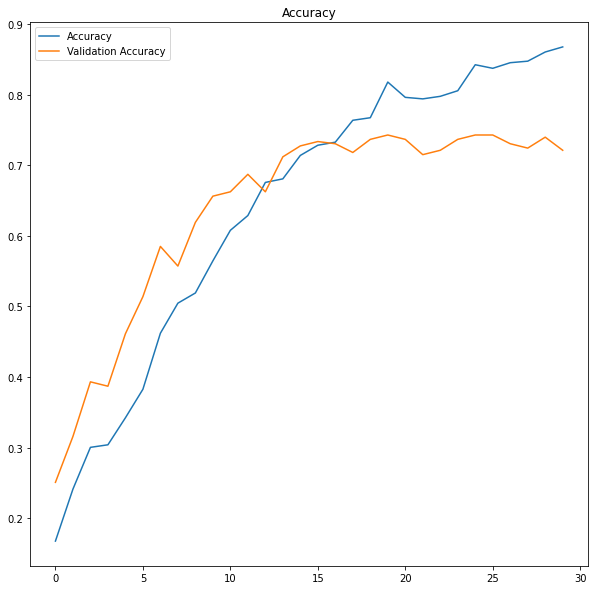

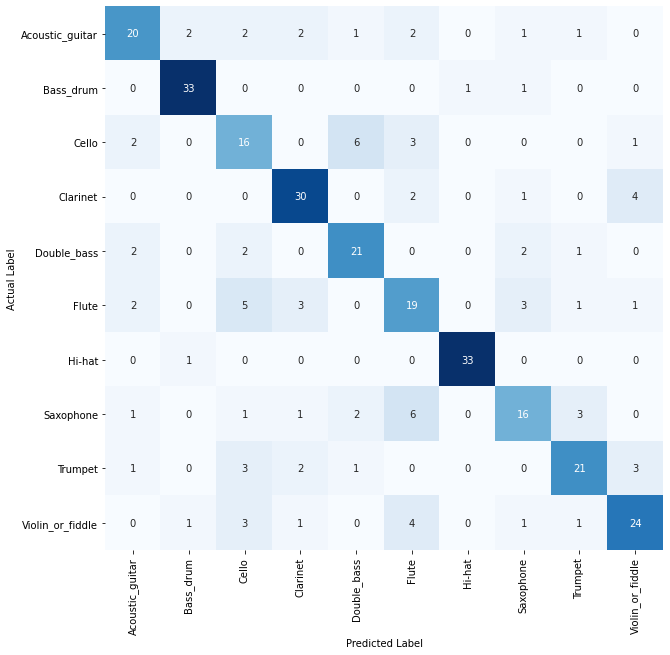

In [85]:
# Train/Validation/Test split
X_train, X_validation, y_train, Y_validation = mfcc_features_training_dataset, mfcc_features_validation_dataset, one_hot_encoded_a, one_hot_encoded_b
X_test, y_test = mfcc_features_testing_dataset, one_hot_encoded_c

# Defining input shape for the neural network
input_shape = (X_train.shape[1], X_train.shape[2], 1)

# Reshape X_train and X_validation such that they are having the same shape as the input shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_validation = X_validation.reshape(X_validation.shape[0], X_validation.shape[1], X_validation.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Constructing the neural network architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', 
     optimizer = 'adam',
     metrics = ['acc'])

# Training the model
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_validation, Y_validation))

# Displaying loss values
plt.figure(figsize = (10, 10))
plt.title('Loss Value')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
print('Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])
plt.show()

# Displaying accuracy scores
plt.figure(figsize=(10, 10))
plt.title('Accuracy')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Accuracy', 'Validation Accuracy'])
print('Accuracy:', history.history['acc'][-1])
print('Validation Accuracy:', history.history['val_acc'][-1])
plt.show()

# Model evaluation
predictions = model.predict(X_validation)

predictions = np.argmax(predictions, axis=1)
Y_validation = one_hot_encoder_b.inverse_transform(Y_validation)

# Creating confusion matrix
cm = confusion_matrix(Y_validation, predictions)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True, xticklabels = label_encoder_a.classes_, yticklabels = label_encoder_b.classes_, fmt = 'd', cmap = plt.cm.Blues, cbar = False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

Epoch 1/30
44/44 [==============================] - 3s 62ms/step - loss: 4.0524 - acc: 0.1185 - val_loss: 2.2430 - val_acc: 0.2043
Epoch 2/30
44/44 [==============================] - 2s 56ms/step - loss: 2.2519 - acc: 0.1397 - val_loss: 2.0844 - val_acc: 0.2941
Epoch 3/30
44/44 [==============================] - 2s 56ms/step - loss: 2.1479 - acc: 0.2097 - val_loss: 1.8904 - val_acc: 0.3591
Epoch 4/30
44/44 [==============================] - 2s 57ms/step - loss: 2.0190 - acc: 0.2759 - val_loss: 1.7526 - val_acc: 0.3994
Epoch 5/30
44/44 [==============================] - 3s 57ms/step - loss: 1.9021 - acc: 0.3313 - val_loss: 1.6456 - val_acc: 0.4241
Epoch 6/30
44/44 [==============================] - 2s 56ms/step - loss: 1.8357 - acc: 0.3408 - val_loss: 1.6707 - val_acc: 0.3932
Epoch 7/30
44/44 [==============================] - 2s 57ms/step - loss: 1.7481 - acc: 0.3942 - val_loss: 1.5776 - val_acc: 0.4892
Epoch 8/30
44/44 [==============================] - 3s 57ms/step - loss: 1.6353 - a

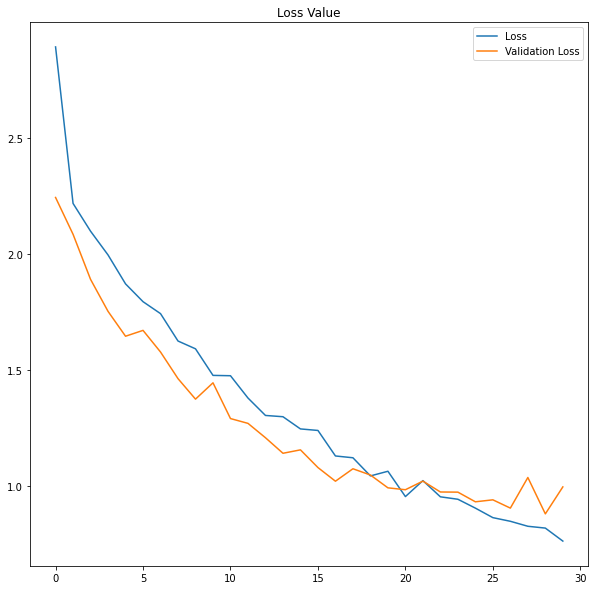

Accuracy: 0.7451263666152954
Validation Accuracy: 0.7368420958518982


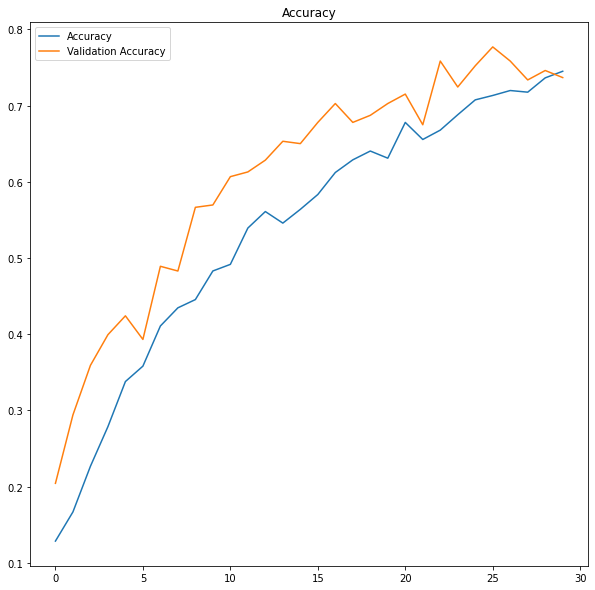

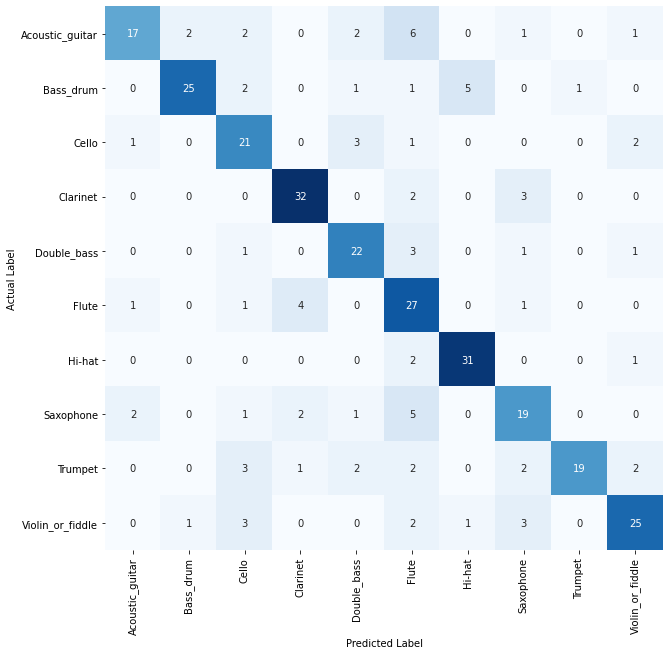

In [86]:
# Train/Validation/Test split
X_train, X_validation, y_train, Y_validation = mfcc_features_training_dataset, mfcc_features_validation_dataset, one_hot_encoded_a, one_hot_encoded_b
X_test, y_test = mfcc_features_testing_dataset, one_hot_encoded_c

# Defining input shape for the neural network
input_shape = (X_train.shape[1], X_train.shape[2], 1)

# Reshape X_train and X_validation such that they are having the same shape as the input shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_validation = X_validation.reshape(X_validation.shape[0], X_validation.shape[1], X_validation.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Constructing the neural network architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', strides=(2, 2), 
    padding='same', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(2, 2), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', 
     optimizer = 'adam',
     metrics = ['acc'])

# Training the model
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_validation, Y_validation))

# Displaying loss values
plt.figure(figsize = (10, 10))
plt.title('Loss Value')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
print('Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])
plt.show()

# Displaying accuracy scores
plt.figure(figsize=(10, 10))
plt.title('Accuracy')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Accuracy', 'Validation Accuracy'])
print('Accuracy:', history.history['acc'][-1])
print('Validation Accuracy:', history.history['val_acc'][-1])
plt.show()

# Model evaluation
predictions = model.predict(X_validation)

predictions = np.argmax(predictions, axis=1)
Y_validation = one_hot_encoder_b.inverse_transform(Y_validation)

# Creating confusion matrix
cm = confusion_matrix(Y_validation, predictions)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True, xticklabels = label_encoder_a.classes_, yticklabels = label_encoder_b.classes_, fmt = 'd', cmap = plt.cm.Blues, cbar = False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

Epoch 1/30
44/44 [==============================] - 4s 88ms/step - loss: 3.7622 - acc: 0.1285 - val_loss: 2.1625 - val_acc: 0.2260
Epoch 2/30
44/44 [==============================] - 4s 83ms/step - loss: 2.1664 - acc: 0.2039 - val_loss: 1.9322 - val_acc: 0.3344
Epoch 3/30
44/44 [==============================] - 4s 82ms/step - loss: 1.9960 - acc: 0.2792 - val_loss: 1.7993 - val_acc: 0.3932
Epoch 4/30
44/44 [==============================] - 4s 80ms/step - loss: 1.8599 - acc: 0.3329 - val_loss: 1.6696 - val_acc: 0.4737
Epoch 5/30
44/44 [==============================] - 4s 80ms/step - loss: 1.7352 - acc: 0.3949 - val_loss: 1.5936 - val_acc: 0.4706
Epoch 6/30
44/44 [==============================] - 4s 80ms/step - loss: 1.6292 - acc: 0.4394 - val_loss: 1.4965 - val_acc: 0.5201
Epoch 7/30
44/44 [==============================] - 4s 82ms/step - loss: 1.6122 - acc: 0.4576 - val_loss: 1.4915 - val_acc: 0.5449
Epoch 8/30
44/44 [==============================] - 4s 81ms/step - loss: 1.5428 - a

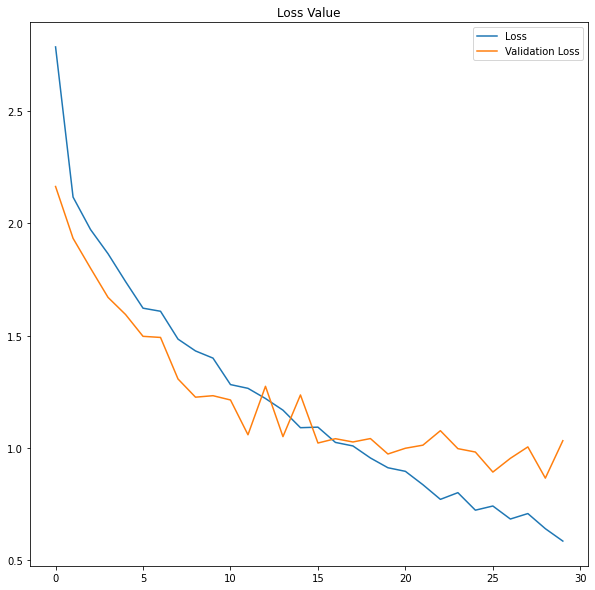

Accuracy: 0.8137184381484985
Validation Accuracy: 0.7492260336875916


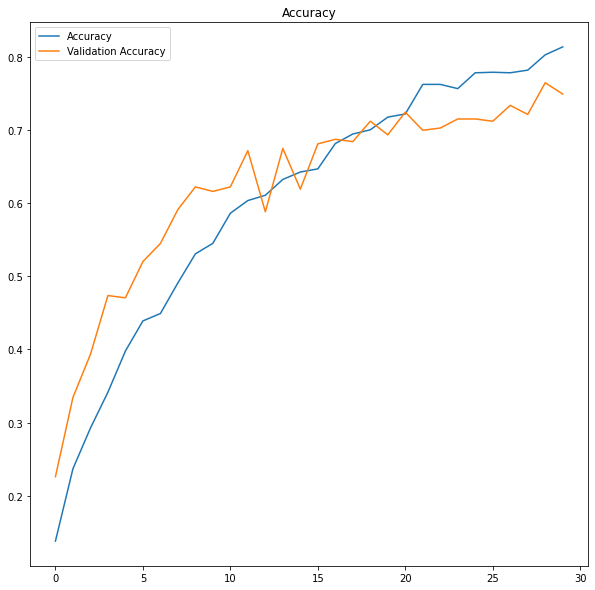

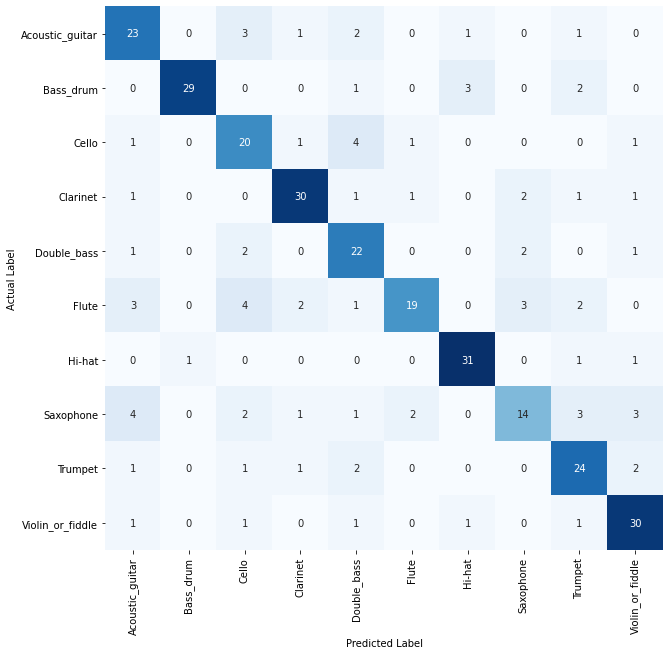

In [87]:
# Train/Validation/Test split
X_train, X_validation, y_train, Y_validation = mfcc_features_training_dataset, mfcc_features_validation_dataset, one_hot_encoded_a, one_hot_encoded_b
X_test, y_test = mfcc_features_testing_dataset, one_hot_encoded_c

# Defining input shape for the neural network
input_shape = (X_train.shape[1], X_train.shape[2], 1)

# Reshape X_train and X_validation such that they are having the same shape as the input shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_validation = X_validation.reshape(X_validation.shape[0], X_validation.shape[1], X_validation.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Constructing the neural network architecture
model = Sequential()
model.add(Conv2D(32, (4, 4), activation='relu', strides=(2, 2), 
    padding='same', input_shape=input_shape))
model.add(Conv2D(64, (4, 4), activation='relu', strides=(2, 2), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', 
     optimizer = 'adam',
     metrics = ['acc'])

# Training the model
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_validation, Y_validation))

# Displaying loss values
plt.figure(figsize = (10, 10))
plt.title('Loss Value')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
print('Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])
plt.show()

# Displaying accuracy scores
plt.figure(figsize=(10, 10))
plt.title('Accuracy')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Accuracy', 'Validation Accuracy'])
print('Accuracy:', history.history['acc'][-1])
print('Validation Accuracy:', history.history['val_acc'][-1])
plt.show()

# Model evaluation
predictions = model.predict(X_validation)

predictions = np.argmax(predictions, axis=1)
Y_validation = one_hot_encoder_b.inverse_transform(Y_validation)

# Creating confusion matrix
cm = confusion_matrix(Y_validation, predictions)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True, xticklabels = label_encoder_a.classes_, yticklabels = label_encoder_b.classes_, fmt = 'd', cmap = plt.cm.Blues, cbar = False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

Epoch 1/30
44/44 [==============================] - 32s 722ms/step - loss: 8.9629 - acc: 0.1482 - val_loss: 2.0022 - val_acc: 0.3498
Epoch 2/30
44/44 [==============================] - 32s 719ms/step - loss: 2.1218 - acc: 0.2896 - val_loss: 1.8471 - val_acc: 0.3591
Epoch 3/30
44/44 [==============================] - 32s 718ms/step - loss: 1.9061 - acc: 0.3565 - val_loss: 1.8041 - val_acc: 0.4241
Epoch 4/30
44/44 [==============================] - 32s 723ms/step - loss: 1.8030 - acc: 0.4068 - val_loss: 1.6219 - val_acc: 0.4923
Epoch 5/30
44/44 [==============================] - 32s 722ms/step - loss: 1.7110 - acc: 0.4167 - val_loss: 1.4639 - val_acc: 0.5511
Epoch 6/30
44/44 [==============================] - 32s 721ms/step - loss: 1.6485 - acc: 0.4688 - val_loss: 1.4367 - val_acc: 0.5449
Epoch 7/30
44/44 [==============================] - 32s 719ms/step - loss: 1.4994 - acc: 0.4973 - val_loss: 1.3668 - val_acc: 0.5759
Epoch 8/30
44/44 [==============================] - 32s 720ms/step - 

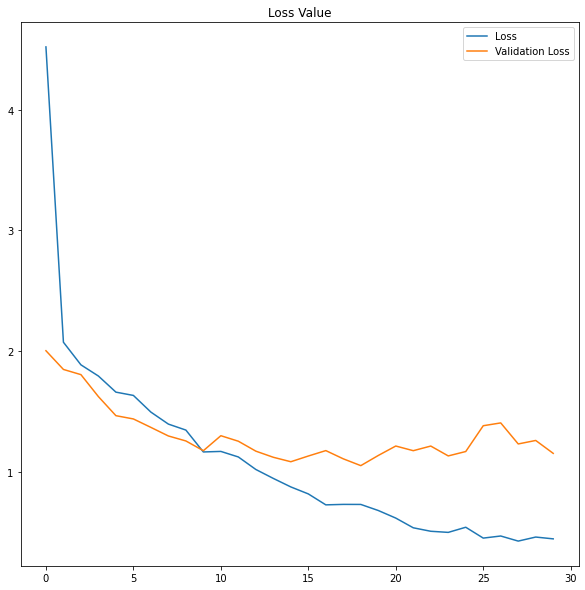

Accuracy: 0.875812292098999
Validation Accuracy: 0.6965944170951843


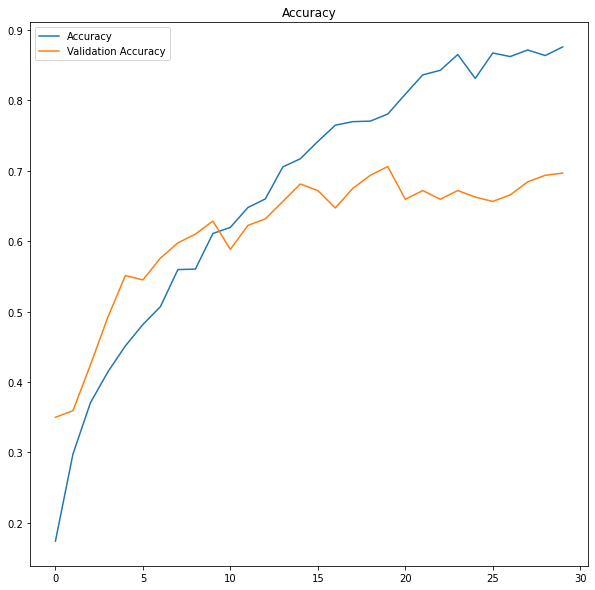

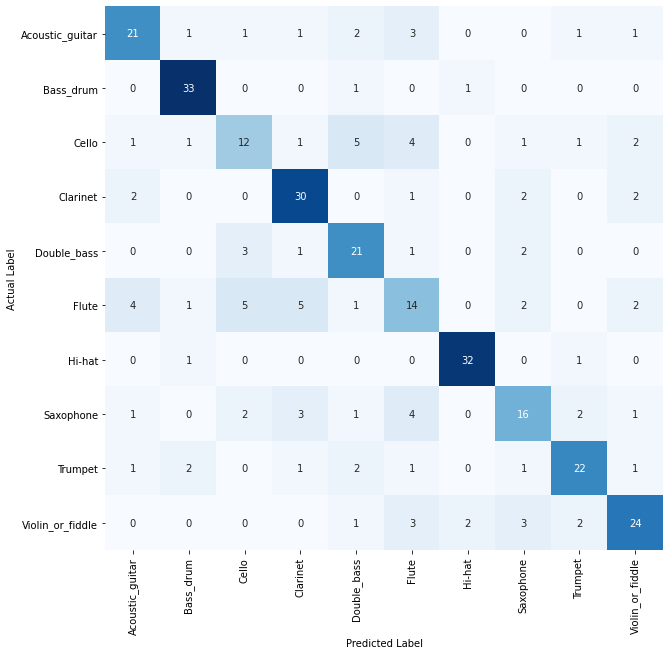

In [88]:
# Train/Validation/Test split
X_train, X_validation, y_train, Y_validation = mfcc_features_training_dataset, mfcc_features_validation_dataset, one_hot_encoded_a, one_hot_encoded_b
X_test, y_test = mfcc_features_testing_dataset, one_hot_encoded_c

# Defining input shape for the neural network
input_shape = (X_train.shape[1], X_train.shape[2], 1)

# Reshape X_train and X_validation such that they are having the same shape as the input shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_validation = X_validation.reshape(X_validation.shape[0], X_validation.shape[1], X_validation.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Constructing the neural network architecture
model = Sequential()
model.add(Conv2D(32, (4, 4), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(Conv2D(64, (4, 4), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', 
     optimizer = 'adam',
     metrics = ['acc'])

# Training the model
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_validation, Y_validation))

# Displaying loss values
plt.figure(figsize = (10, 10))
plt.title('Loss Value')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
print('Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])
plt.show()

# Displaying accuracy scores
plt.figure(figsize=(10, 10))
plt.title('Accuracy')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Accuracy', 'Validation Accuracy'])
print('Accuracy:', history.history['acc'][-1])
print('Validation Accuracy:', history.history['val_acc'][-1])
plt.show()

# Model evaluation
predictions = model.predict(X_validation)

predictions = np.argmax(predictions, axis=1)
Y_validation = one_hot_encoder_b.inverse_transform(Y_validation)

# Creating confusion matrix
cm = confusion_matrix(Y_validation, predictions)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True, xticklabels = label_encoder_a.classes_, yticklabels = label_encoder_b.classes_, fmt = 'd', cmap = plt.cm.Blues, cbar = False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

Epoch 1/30
44/44 [==============================] - 19s 420ms/step - loss: 6.3042 - acc: 0.1148 - val_loss: 2.2129 - val_acc: 0.1950
Epoch 2/30
44/44 [==============================] - 18s 414ms/step - loss: 2.2149 - acc: 0.1814 - val_loss: 2.0747 - val_acc: 0.2817
Epoch 3/30
44/44 [==============================] - 18s 417ms/step - loss: 2.1321 - acc: 0.2143 - val_loss: 1.9930 - val_acc: 0.3282
Epoch 4/30
44/44 [==============================] - 18s 415ms/step - loss: 2.0572 - acc: 0.2434 - val_loss: 1.9502 - val_acc: 0.3653
Epoch 5/30
44/44 [==============================] - 18s 417ms/step - loss: 2.0001 - acc: 0.2709 - val_loss: 1.8370 - val_acc: 0.4644
Epoch 6/30
44/44 [==============================] - 18s 418ms/step - loss: 1.8475 - acc: 0.3202 - val_loss: 1.7212 - val_acc: 0.4923
Epoch 7/30
44/44 [==============================] - 18s 416ms/step - loss: 1.7398 - acc: 0.3966 - val_loss: 1.5694 - val_acc: 0.5015
Epoch 8/30
44/44 [==============================] - 18s 417ms/step - 

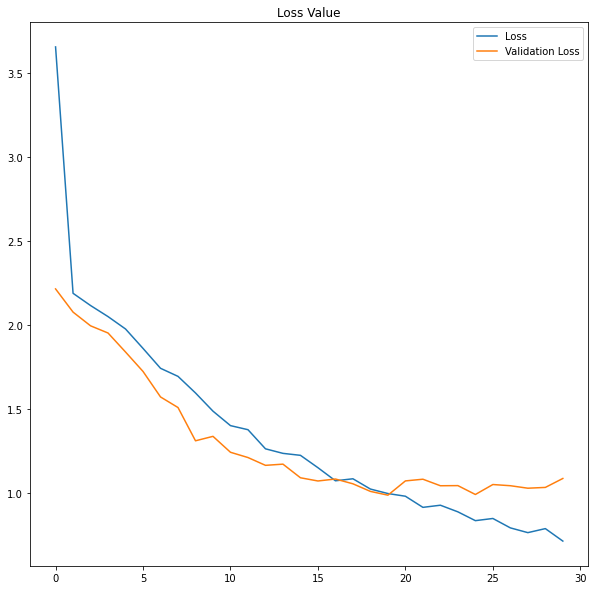

Accuracy: 0.7689530849456787
Validation Accuracy: 0.7058823704719543


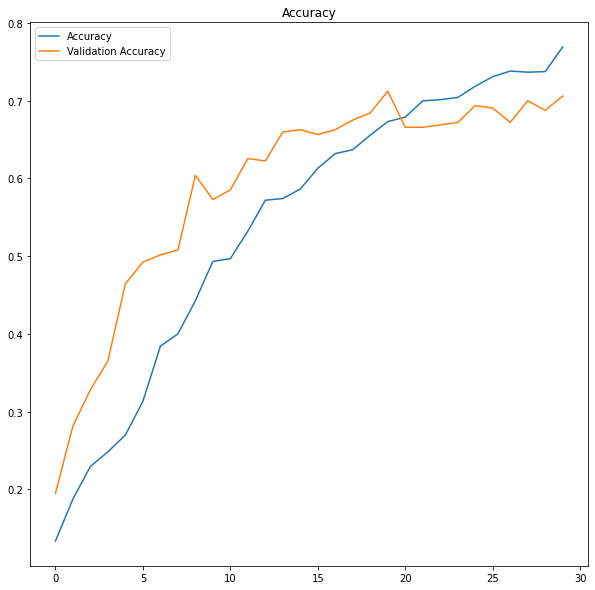

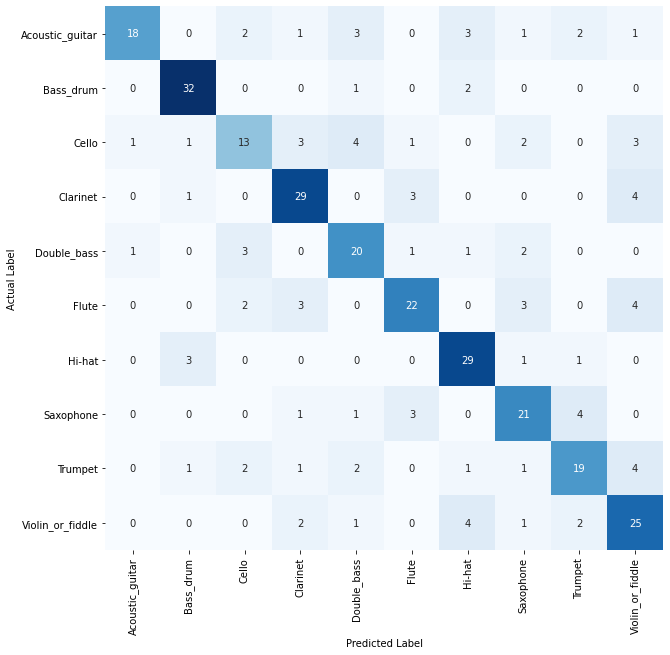

In [89]:
# Train/Validation/Test split
X_train, X_validation, y_train, Y_validation = mfcc_features_training_dataset, mfcc_features_validation_dataset, one_hot_encoded_a, one_hot_encoded_b
X_test, y_test = mfcc_features_testing_dataset, one_hot_encoded_c

# Defining input shape for the neural network
input_shape = (X_train.shape[1], X_train.shape[2], 1)

# Reshape X_train and X_validation such that they are having the same shape as the input shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_validation = X_validation.reshape(X_validation.shape[0], X_validation.shape[1], X_validation.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Constructing the neural network architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((3, 3)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', 
     optimizer = 'adam',
     metrics = ['acc'])

# Training the model
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_validation, Y_validation))

# Displaying loss values
plt.figure(figsize = (10, 10))
plt.title('Loss Value')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
print('Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])
plt.show()

# Displaying accuracy scores
plt.figure(figsize=(10, 10))
plt.title('Accuracy')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Accuracy', 'Validation Accuracy'])
print('Accuracy:', history.history['acc'][-1])
print('Validation Accuracy:', history.history['val_acc'][-1])
plt.show()

# Model evaluation
predictions = model.predict(X_validation)

predictions = np.argmax(predictions, axis=1)
Y_validation = one_hot_encoder_b.inverse_transform(Y_validation)

# Creating confusion matrix
cm = confusion_matrix(Y_validation, predictions)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True, xticklabels = label_encoder_a.classes_, yticklabels = label_encoder_b.classes_, fmt = 'd', cmap = plt.cm.Blues, cbar = False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

Epoch 1/30
44/44 [==============================] - 4s 54ms/step - loss: 4.4349 - acc: 0.1021 - val_loss: 2.2990 - val_acc: 0.1238
Epoch 2/30
44/44 [==============================] - 2s 48ms/step - loss: 2.3315 - acc: 0.0919 - val_loss: 2.2908 - val_acc: 0.1238
Epoch 3/30
44/44 [==============================] - 2s 48ms/step - loss: 2.3105 - acc: 0.1277 - val_loss: 2.2947 - val_acc: 0.1610
Epoch 4/30
44/44 [==============================] - 2s 49ms/step - loss: 2.2933 - acc: 0.1144 - val_loss: 2.2739 - val_acc: 0.1734
Epoch 5/30
44/44 [==============================] - 2s 49ms/step - loss: 2.2718 - acc: 0.1460 - val_loss: 2.2622 - val_acc: 0.2136
Epoch 6/30
44/44 [==============================] - 2s 48ms/step - loss: 2.2493 - acc: 0.1510 - val_loss: 2.2244 - val_acc: 0.2074
Epoch 7/30
44/44 [==============================] - 2s 48ms/step - loss: 2.2276 - acc: 0.1538 - val_loss: 2.1297 - val_acc: 0.3158
Epoch 8/30
44/44 [==============================] - 2s 48ms/step - loss: 2.1903 - a

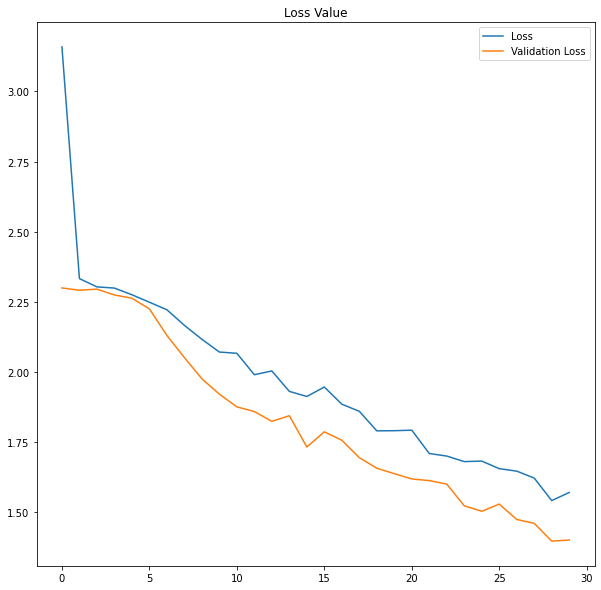

Accuracy: 0.4454873502254486
Validation Accuracy: 0.49226006865501404


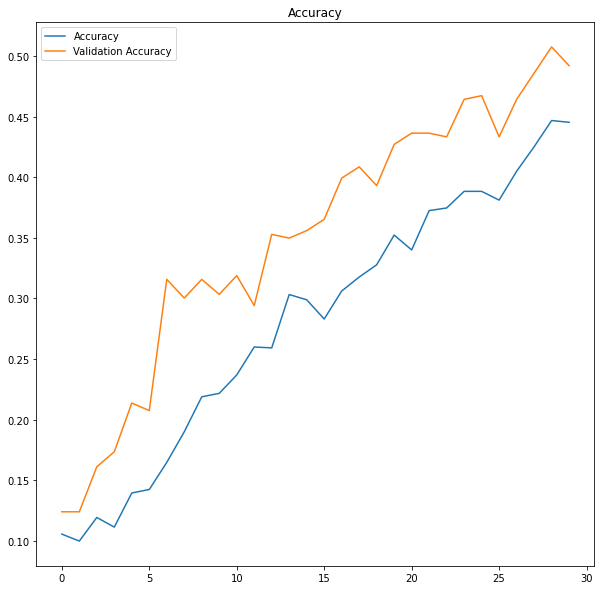

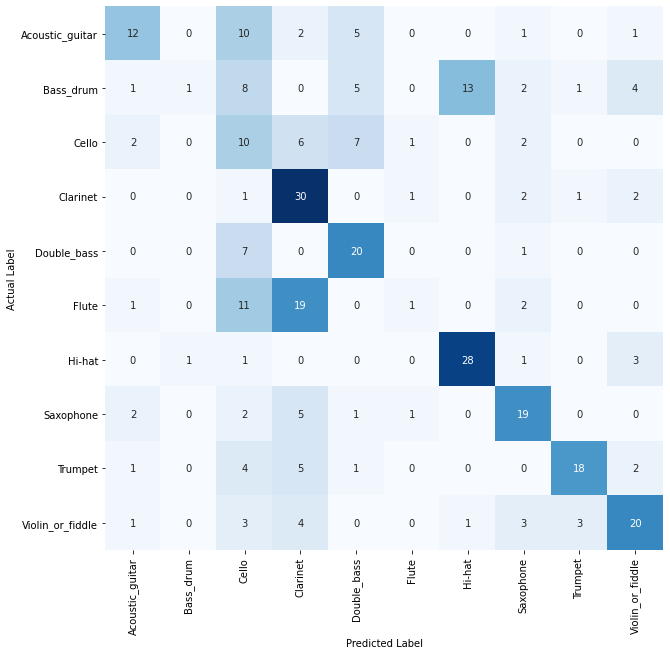

In [90]:
# Train/Validation/Test split
X_train, X_validation, y_train, Y_validation = mfcc_features_training_dataset, mfcc_features_validation_dataset, one_hot_encoded_a, one_hot_encoded_b
X_test, y_test = mfcc_features_testing_dataset, one_hot_encoded_c

# Defining input shape for the neural network
input_shape = (X_train.shape[1], X_train.shape[2], 1)

# Reshape X_train and X_validation such that they are having the same shape as the input shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_validation = X_validation.reshape(X_validation.shape[0], X_validation.shape[1], X_validation.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Constructing the neural network architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', strides=(2, 2), 
    padding='same', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(2, 2), 
    padding='same'))
model.add(MaxPool2D((3, 3)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', 
     optimizer = 'adam',
     metrics = ['acc'])

# Training the model
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_validation, Y_validation))

# Displaying loss values
plt.figure(figsize = (10, 10))
plt.title('Loss Value')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
print('Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])
plt.show()

# Displaying accuracy scores
plt.figure(figsize=(10, 10))
plt.title('Accuracy')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Accuracy', 'Validation Accuracy'])
print('Accuracy:', history.history['acc'][-1])
print('Validation Accuracy:', history.history['val_acc'][-1])
plt.show()

# Model evaluation
predictions = model.predict(X_validation)

predictions = np.argmax(predictions, axis=1)
Y_validation = one_hot_encoder_b.inverse_transform(Y_validation)

# Creating confusion matrix
cm = confusion_matrix(Y_validation, predictions)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True, xticklabels = label_encoder_a.classes_, yticklabels = label_encoder_b.classes_, fmt = 'd', cmap = plt.cm.Blues, cbar = False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

Epoch 1/30
44/44 [==============================] - 19s 420ms/step - loss: 8.1865 - acc: 0.1231 - val_loss: 2.2990 - val_acc: 0.1548
Epoch 2/30
44/44 [==============================] - 18s 416ms/step - loss: 2.2867 - acc: 0.1294 - val_loss: 2.2921 - val_acc: 0.1362
Epoch 3/30
44/44 [==============================] - 18s 415ms/step - loss: 2.2846 - acc: 0.1510 - val_loss: 2.2610 - val_acc: 0.2198
Epoch 4/30
44/44 [==============================] - 18s 417ms/step - loss: 2.2614 - acc: 0.1366 - val_loss: 2.2558 - val_acc: 0.2043
Epoch 5/30
44/44 [==============================] - 18s 416ms/step - loss: 2.2642 - acc: 0.1617 - val_loss: 2.2168 - val_acc: 0.2415
Epoch 6/30
44/44 [==============================] - 18s 416ms/step - loss: 2.2282 - acc: 0.1497 - val_loss: 2.1964 - val_acc: 0.2817
Epoch 7/30
44/44 [==============================] - 18s 416ms/step - loss: 2.2263 - acc: 0.1833 - val_loss: 2.1321 - val_acc: 0.2910
Epoch 8/30
44/44 [==============================] - 18s 418ms/step - 

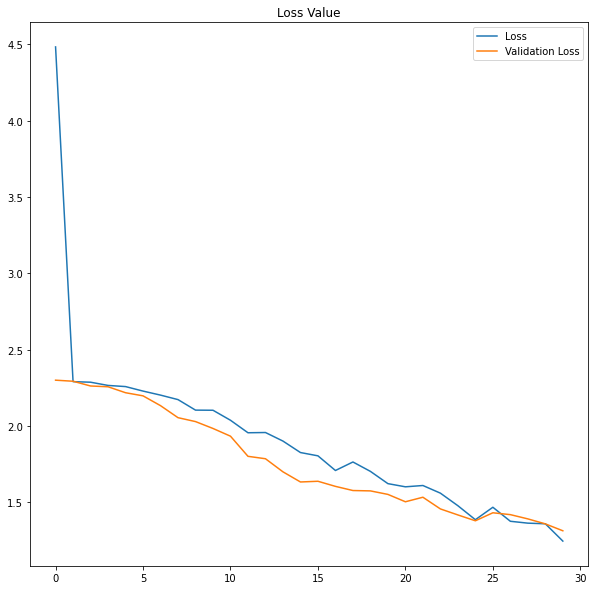

Accuracy: 0.5646209120750427
Validation Accuracy: 0.5975232124328613


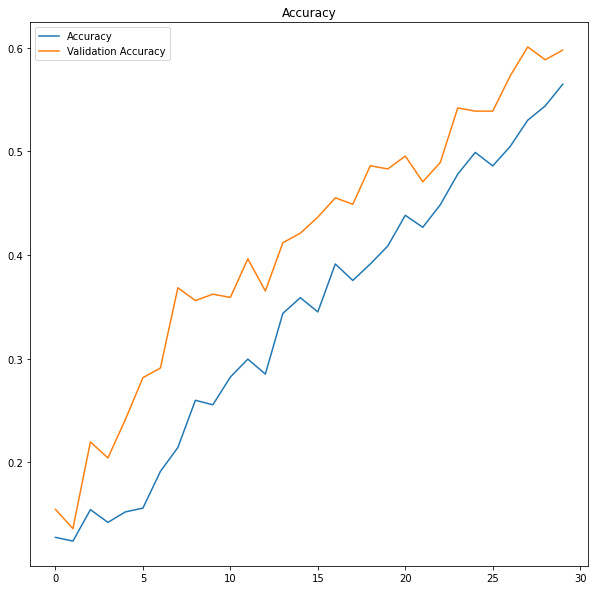

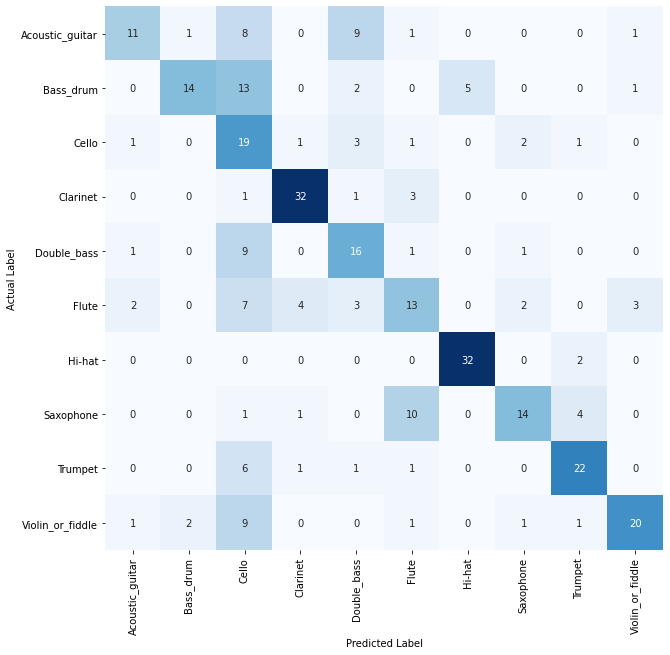

In [91]:
# Train/Validation/Test split
X_train, X_validation, y_train, Y_validation = mfcc_features_training_dataset, mfcc_features_validation_dataset, one_hot_encoded_a, one_hot_encoded_b
X_test, y_test = mfcc_features_testing_dataset, one_hot_encoded_c

# Defining input shape for the neural network
input_shape = (X_train.shape[1], X_train.shape[2], 1)

# Reshape X_train and X_validation such that they are having the same shape as the input shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_validation = X_validation.reshape(X_validation.shape[0], X_validation.shape[1], X_validation.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Constructing the neural network architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((3, 3)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', 
     optimizer = 'adam',
     metrics = ['acc'])

# Training the model
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_validation, Y_validation))

# Displaying loss values
plt.figure(figsize = (10, 10))
plt.title('Loss Value')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
print('Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])
plt.show()

# Displaying accuracy scores
plt.figure(figsize=(10, 10))
plt.title('Accuracy')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Accuracy', 'Validation Accuracy'])
print('Accuracy:', history.history['acc'][-1])
print('Validation Accuracy:', history.history['val_acc'][-1])
plt.show()

# Model evaluation
predictions = model.predict(X_validation)

predictions = np.argmax(predictions, axis=1)
Y_validation = one_hot_encoder_b.inverse_transform(Y_validation)

# Creating confusion matrix
cm = confusion_matrix(Y_validation, predictions)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True, xticklabels = label_encoder_a.classes_, yticklabels = label_encoder_b.classes_, fmt = 'd', cmap = plt.cm.Blues, cbar = False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

Epoch 1/30
44/44 [==============================] - 2s 43ms/step - loss: 2.9567 - acc: 0.1983 - val_loss: 1.6587 - val_acc: 0.4056
Epoch 2/30
44/44 [==============================] - 2s 39ms/step - loss: 1.6511 - acc: 0.4157 - val_loss: 1.4204 - val_acc: 0.5263
Epoch 3/30
44/44 [==============================] - 2s 39ms/step - loss: 1.4723 - acc: 0.4893 - val_loss: 1.3457 - val_acc: 0.5604
Epoch 4/30
44/44 [==============================] - 2s 39ms/step - loss: 1.3137 - acc: 0.5599 - val_loss: 1.2999 - val_acc: 0.5913
Epoch 5/30
44/44 [==============================] - 2s 39ms/step - loss: 1.1322 - acc: 0.6255 - val_loss: 1.2281 - val_acc: 0.5944
Epoch 6/30
44/44 [==============================] - 2s 38ms/step - loss: 1.0385 - acc: 0.6376 - val_loss: 1.2070 - val_acc: 0.6006
Epoch 7/30
44/44 [==============================] - 2s 39ms/step - loss: 0.9722 - acc: 0.6729 - val_loss: 1.0510 - val_acc: 0.6409
Epoch 8/30
44/44 [==============================] - 2s 39ms/step - loss: 0.8855 - a

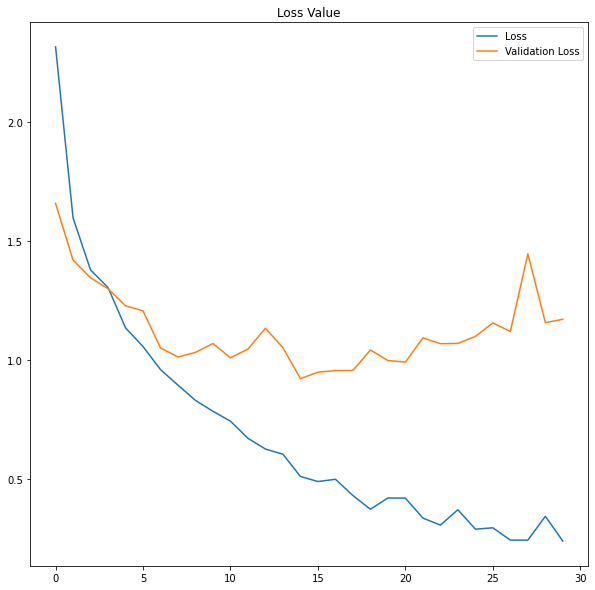

Accuracy: 0.9191336035728455
Validation Accuracy: 0.7306501269340515


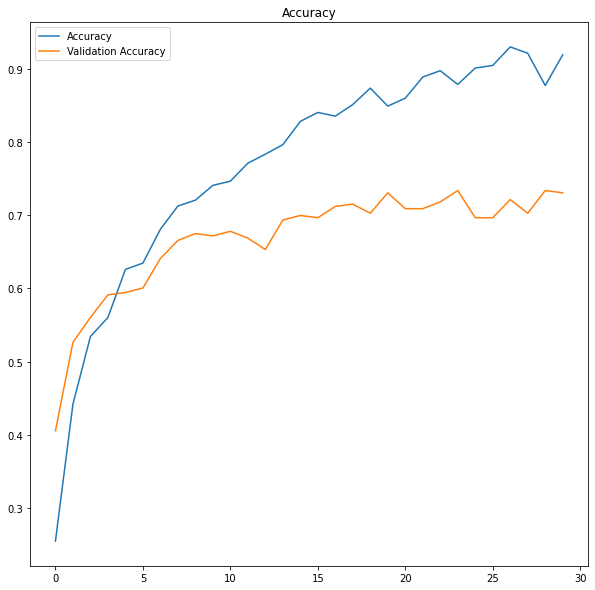

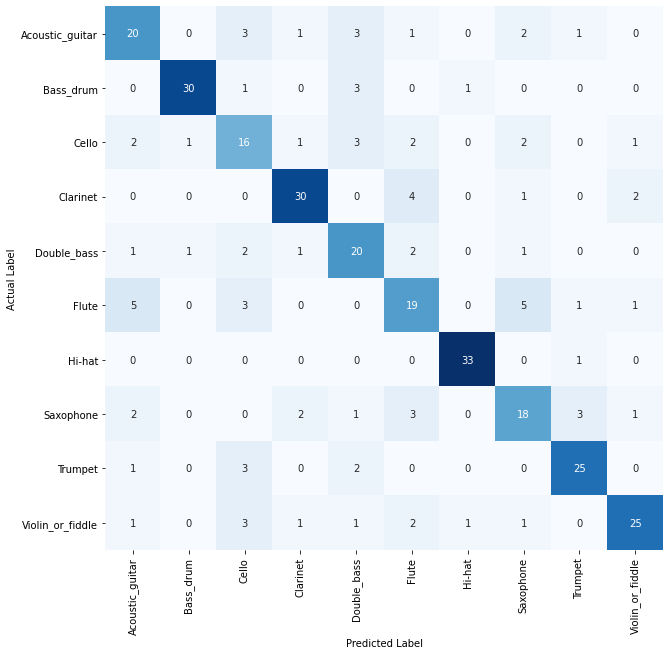

In [92]:
# Train/Validation/Test split
X_train, X_validation, y_train, Y_validation = mfcc_features_training_dataset, mfcc_features_validation_dataset, one_hot_encoded_a, one_hot_encoded_b
X_test, y_test = mfcc_features_testing_dataset, one_hot_encoded_c

# Defining input shape for the neural network
input_shape = (X_train.shape[1], X_train.shape[2], 1)

# Reshape X_train and X_validation such that they are having the same shape as the input shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_validation = X_validation.reshape(X_validation.shape[0], X_validation.shape[1], X_validation.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Constructing the neural network architecture
model = Sequential()
model.add(Conv2D(32, (4, 4), activation='relu', strides=(2, 2), 
    padding='same', input_shape=input_shape))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (4, 4), activation='relu', strides=(2, 2), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', 
     optimizer = 'adam',
     metrics = ['acc'])

# Training the model
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_validation, Y_validation))

# Displaying loss values
plt.figure(figsize = (10, 10))
plt.title('Loss Value')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
print('Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])
plt.show()

# Displaying accuracy scores
plt.figure(figsize=(10, 10))
plt.title('Accuracy')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Accuracy', 'Validation Accuracy'])
print('Accuracy:', history.history['acc'][-1])
print('Validation Accuracy:', history.history['val_acc'][-1])
plt.show()

# Model evaluation
predictions = model.predict(X_validation)

predictions = np.argmax(predictions, axis=1)
Y_validation = one_hot_encoder_b.inverse_transform(Y_validation)

# Creating confusion matrix
cm = confusion_matrix(Y_validation, predictions)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True, xticklabels = label_encoder_a.classes_, yticklabels = label_encoder_b.classes_, fmt = 'd', cmap = plt.cm.Blues, cbar = False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

Epoch 1/30
44/44 [==============================] - 3s 44ms/step - loss: 3.2481 - acc: 0.1393 - val_loss: 2.1537 - val_acc: 0.1920
Epoch 2/30
44/44 [==============================] - 2s 39ms/step - loss: 2.1056 - acc: 0.2348 - val_loss: 1.9250 - val_acc: 0.3127
Epoch 3/30
44/44 [==============================] - 2s 38ms/step - loss: 1.8944 - acc: 0.3025 - val_loss: 1.7251 - val_acc: 0.4768
Epoch 4/30
44/44 [==============================] - 2s 39ms/step - loss: 1.7754 - acc: 0.3632 - val_loss: 1.6275 - val_acc: 0.4706
Epoch 5/30
44/44 [==============================] - 2s 39ms/step - loss: 1.7687 - acc: 0.3871 - val_loss: 1.4949 - val_acc: 0.5232
Epoch 6/30
44/44 [==============================] - 2s 39ms/step - loss: 1.5351 - acc: 0.4712 - val_loss: 1.4429 - val_acc: 0.5108
Epoch 7/30
44/44 [==============================] - 2s 39ms/step - loss: 1.4887 - acc: 0.4716 - val_loss: 1.3758 - val_acc: 0.5201
Epoch 8/30
44/44 [==============================] - 2s 40ms/step - loss: 1.4080 - a

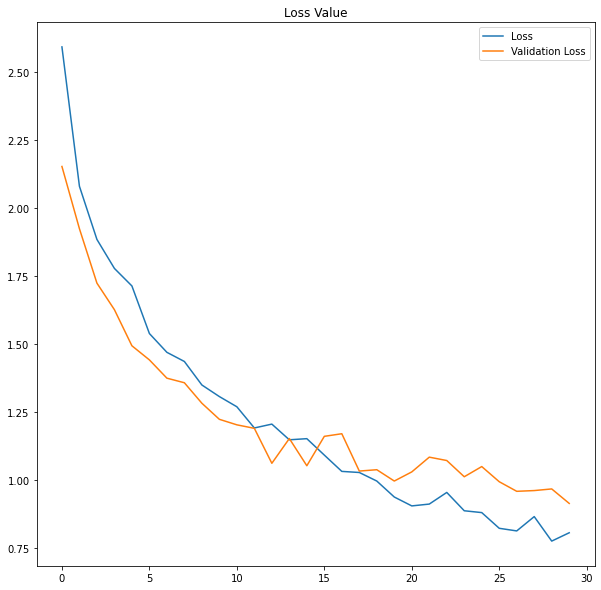

Accuracy: 0.7422382831573486
Validation Accuracy: 0.7306501269340515


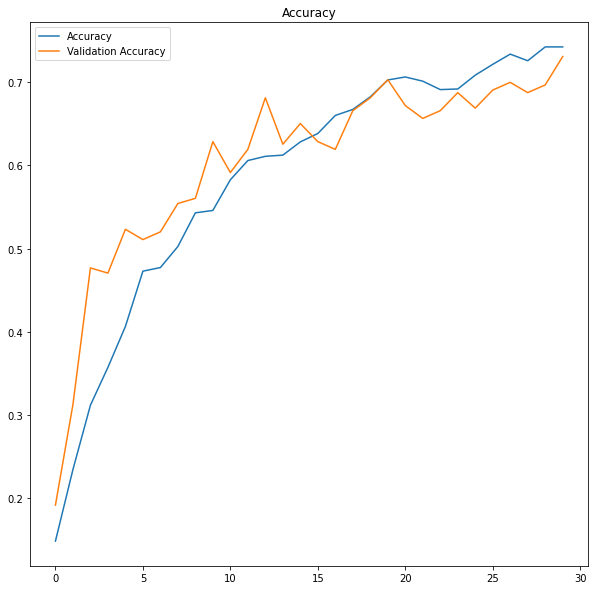

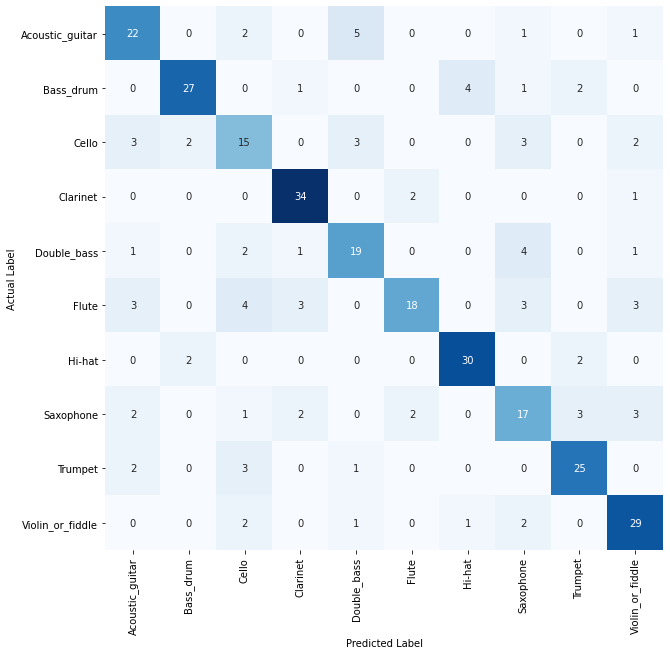

In [93]:
# Train/Validation/Test split
X_train, X_validation, y_train, Y_validation = mfcc_features_training_dataset, mfcc_features_validation_dataset, one_hot_encoded_a, one_hot_encoded_b
X_test, y_test = mfcc_features_testing_dataset, one_hot_encoded_c

# Defining input shape for the neural network
input_shape = (X_train.shape[1], X_train.shape[2], 1)

# Reshape X_train and X_validation such that they are having the same shape as the input shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_validation = X_validation.reshape(X_validation.shape[0], X_validation.shape[1], X_validation.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Constructing the neural network architecture
model = Sequential()
model.add(Conv2D(32, (4, 4), activation='relu', strides=(2, 2), 
    padding='same', input_shape=input_shape))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (4, 4), activation='relu', strides=(2, 2), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', 
     optimizer = 'adam',
     metrics = ['acc'])

# Training the model
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_validation, Y_validation))

# Displaying loss values
plt.figure(figsize = (10, 10))
plt.title('Loss Value')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
print('Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])
plt.show()

# Displaying accuracy scores
plt.figure(figsize=(10, 10))
plt.title('Accuracy')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Accuracy', 'Validation Accuracy'])
print('Accuracy:', history.history['acc'][-1])
print('Validation Accuracy:', history.history['val_acc'][-1])
plt.show()

# Model evaluation
predictions = model.predict(X_validation)

predictions = np.argmax(predictions, axis=1)
Y_validation = one_hot_encoder_b.inverse_transform(Y_validation)

# Creating confusion matrix
cm = confusion_matrix(Y_validation, predictions)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True, xticklabels = label_encoder_a.classes_, yticklabels = label_encoder_b.classes_, fmt = 'd', cmap = plt.cm.Blues, cbar = False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()